In [2]:
# import libraries
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# read in an excel file with multiple sheets
data_full = pd.ExcelFile('CleanedBMFile2000toJul2017.xls')

#for column_headers in data_july_2017.columns: 
    #print(column_headers)

#print(data_full.sheet_names)

Display price in dollars for all countries in July 2017 as a bar chart.

Text(0, 0.5, 'Price in USD')

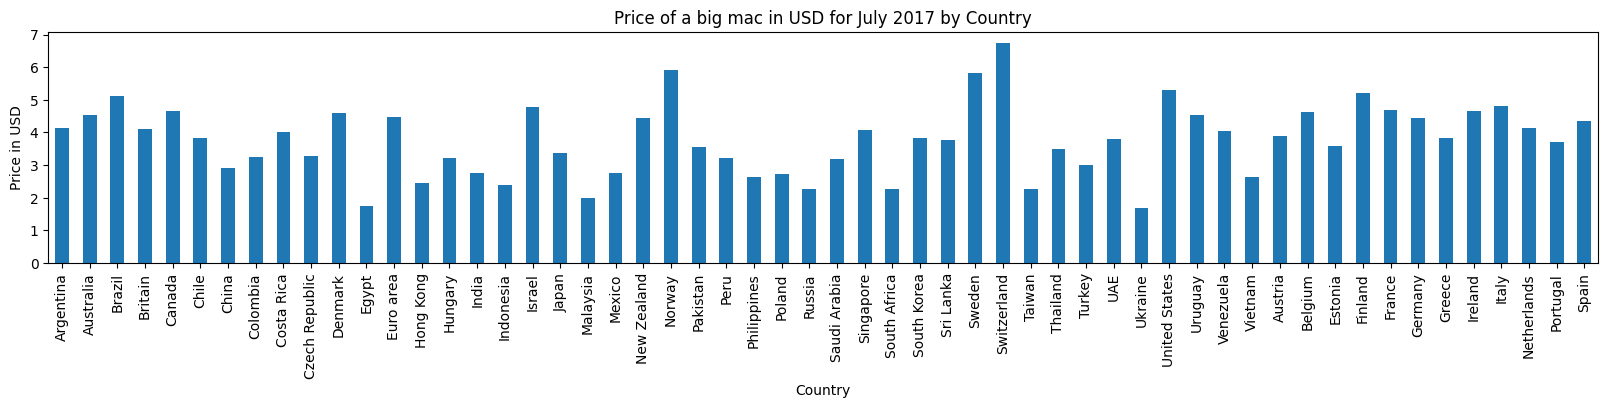

In [4]:
# set data from July 2017 as a dataframe
data_july_2017 = pd.read_excel(data_full, 'Jul2017')

# set the index to the country
data_july_2017 = data_july_2017.set_index('Country')

# plot the data
dollar_july_2017 = data_july_2017['dollar_price'].plot(kind="bar", title='Price of a big mac in USD for July 2017 by Country', figsize=(20, 3))

# add the relevant y label
dollar_july_2017.set_ylabel("Price in USD")

Display data for Malaysia from April 2000 to July 2017.

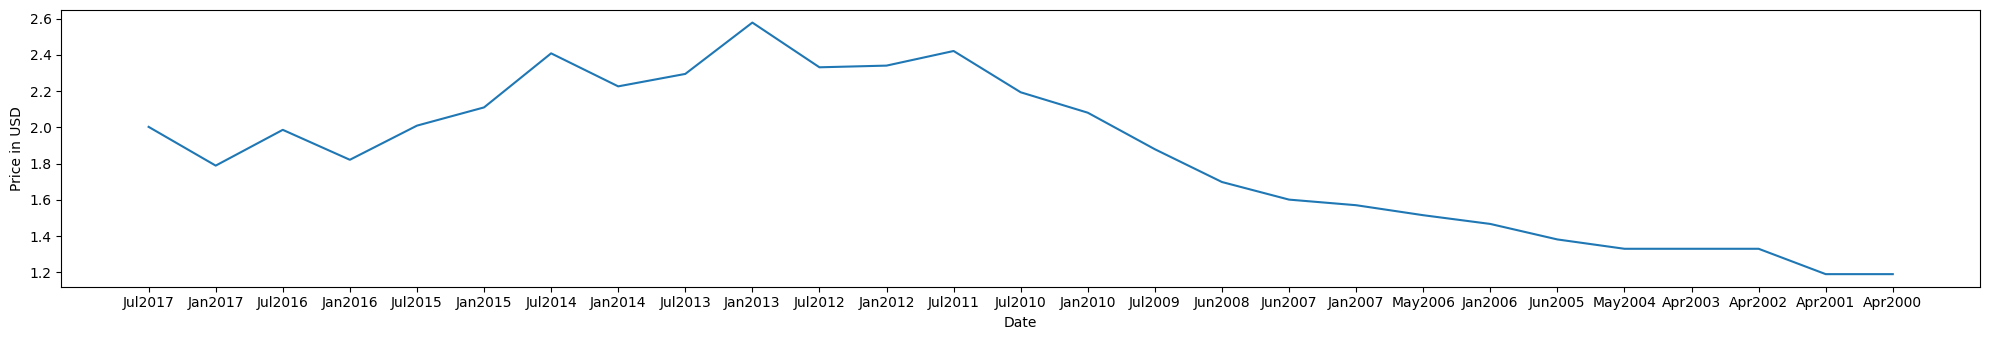

In [12]:
# set the default plot size
plt.rcParams["figure.figsize"] = [20, 3.50]
plt.rcParams["figure.autolayout"] = True

# create an empty list to store the dollar prices for each sheet
dollar_prices = []

# for each sheet in the excel file
for sheet in data_full.sheet_names:
    # read in the sheet as a dataframe
    data = pd.read_excel(data_full, sheet)

    # retrieve the dollar price for Malaysia
    dollar_price = data.loc[data['Country'] == 'Malaysia', 'dollar_price']

    # append the dollar price to the list
    dollar_prices.append(dollar_price)

# plot the prices with the sheet names as the x axis labels
plt.plot(data_full.sheet_names, dollar_prices)

# set axis labels
plt.ylabel('Price in USD')
plt.xlabel('Date')

# show the plot
plt.show()


Display data from each country from April 2000 to July 2017, ensuring representation of years with no data.

In [24]:
from collections import defaultdict
from ipywidgets import widgets, interactive

# set the default plot size
plt.rcParams["figure.figsize"] = [20, 3.50]
plt.rcParams["figure.autolayout"] = True

# create a dictionary with country names as keys and lists of prices as values
dollar_prices = defaultdict(list)

# set initial list size to 0
size = 0

# for each sheet in the excel file
for sheet in data_full.sheet_names:
    # read in the sheet as a dataframe
    data = pd.read_excel(data_full, sheet)

    # store the dollar price for each country in dictionary
    for country in data['Country']:

        # retrieve the dollar price for each country
        dollar_price = data.loc[data['Country'] == country, 'dollar_price']

        # append the dollar price to the list
        dollar_prices[country].append(dollar_price)

countries_to_remove = []

# plot the prices with the sheet names as the x axis labels
for country in dollar_prices.keys():
    country_prices = dollar_prices[country]

    # don't plot countries that don't appear in most recent sheet
    if len(country_prices) != 27:
        # remove countries that don't appear in most recent sheet
        countries_to_remove.append(country)

for country in countries_to_remove:
    dollar_prices.pop(country)

# drop down menu to select which country is shown
list_of_keys = list(dollar_prices.keys())

country = widgets.Dropdown(
    options=list_of_keys,
    value='Uruguay',
    description='Country:',
)

# function to plot the data for the selected country
def plotit(country):
    plt.plot(data_full.sheet_names, dollar_prices[country])
    plt.ylabel('Price in USD')
    plt.xlabel('Date')
    plt.show()


# show the plot
interactive(plotit, country=country)

interactive(children=(Dropdown(description='Country:', index=41, options=('Argentina', 'Australia', 'Brazil', …

Display data for all countries in July 2017 on a map.